# **Regresión Lineal**

Vamos a tratar de predecir cuántos goles hará cada equipo en el campeonato. Primero importamos todas las librerías que usaremos y las instalamos en caso de ser necesario.

In [184]:
# Instalamos las librerías necesarias
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install sklearn
%pip install pickle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [185]:
# Importamos las librerías necesarias
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score
import pickle

El próximo paso es cargar los datos limpios.

In [186]:
datos = pd.read_csv('../data/equipos_limpio.csv')
datos.head()

,Season,Squad,Country,# Pl,Age,MP,Starts,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2022-2023,Ajax,Países bajos,19,26.4,6,66,11,9,20,10,1,1,15.0,1.0
1,2022-2023,Atlético Madrid,España,22,28.6,6,66,4,3,7,4,0,2,11.0,0.0
2,2022-2023,Barcelona,España,26,26.4,6,66,12,10,22,12,0,0,9.0,0.0
3,2022-2023,Bayern Munich,Alemania,24,26.6,10,110,21,19,40,20,1,1,20.0,1.0
4,2022-2023,Benfica,Portugal,24,26.0,10,110,25,16,41,20,5,5,19.0,0.0


In [187]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   640 non-null    object 
 1   Squad    640 non-null    object 
 2   Country  640 non-null    object 
 3   # Pl     640 non-null    int64  
 4   Age      640 non-null    float64
 5   MP       640 non-null    int64  
 6   Starts   640 non-null    int64  
 7   Gls      640 non-null    int64  
 8   Ast      640 non-null    int64  
 9   G+A      640 non-null    int64  
 10  G-PK     640 non-null    int64  
 11  PK       640 non-null    int64  
 12  PKatt    640 non-null    int64  
 13  CrdY     576 non-null    float64
 14  CrdR     576 non-null    float64
dtypes: float64(3), int64(9), object(3)
memory usage: 75.1+ KB


Vemos que todavía tenemos algunas filas nulas. Al limpiar los datos no nos importaba tener algunas filas nulas, pero para hacer la regresión es muy importante no contar con ningún dato de este tipo.

In [188]:
# Eliminamos las filas que contienen valores nulos
datos = datos.dropna()

# Vemos que se ha hecho el cambio correctamente
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 639
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   576 non-null    object 
 1   Squad    576 non-null    object 
 2   Country  576 non-null    object 
 3   # Pl     576 non-null    int64  
 4   Age      576 non-null    float64
 5   MP       576 non-null    int64  
 6   Starts   576 non-null    int64  
 7   Gls      576 non-null    int64  
 8   Ast      576 non-null    int64  
 9   G+A      576 non-null    int64  
 10  G-PK     576 non-null    int64  
 11  PK       576 non-null    int64  
 12  PKatt    576 non-null    int64  
 13  CrdY     576 non-null    float64
 14  CrdR     576 non-null    float64
dtypes: float64(3), int64(9), object(3)
memory usage: 72.0+ KB


Observamos que hay algunas variables categóricas que podríamos pasar a numéricas, pues nos podrían ayudar en nuestra predicción posteriormente.

In [189]:
print(datos['Season'].unique())
print(datos['Squad'].unique())
print(datos['Country'].unique())

['2022-2023' '2021-2022' '2020-2021' '2019-2020' '2018-2019' '2016-2017'
 '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011' '2009-2010'
 '2008-2009' '2007-2008' '2006-2007' '2005-2006' '2004-2005' '2003-2004']
['Ajax' 'Atlético Madrid' 'Barcelona' 'Bayern Munich' 'Benfica' 'Celtic'
 'Chelsea' 'Club Brugge' 'Dinamo Zagreb' 'Dortmund' 'Eint Frankfurt'
 'FC Copenhagen' 'Inter' 'Juventus' 'Leverkusen' 'Liverpool'
 'Maccabi Haifa' 'Manchester City' 'Marseille' 'Milan' 'Napoli'
 'Paris S-G' 'Porto' 'Rangers' 'RB Leipzig' 'RB Salzburg' 'Real Madrid'
 'Sevilla' 'Shakhtar' 'Sporting CP' 'Tottenham' 'Viktoria Plzeň'
 'Atalanta' 'Beşiktaş' 'Dynamo Kyiv' 'Lille' 'Malmö' 'Manchester Utd'
 'Sheriff Tiraspol' 'Villarreal' 'Wolfsburg' 'Young Boys' 'ruZen'
 'Başakşehir' 'Ferencváros' 'Krasnodar' 'Lazio' 'Loko Moscow' "M'Gladbach"
 'Midtjylland' 'Olympiacos' 'frRenn' 'Galatasaray' 'Genk' 'Lyon'
 'Red Star' 'Slavia Prague' 'Valencia' 'AEK Athens' 'CSKA Moscow'
 'Hoffenheim' 'Monaco' 'PSV Eindho

Vemos que hay muchos equipos diferentes, así que no vale la pena convertir esta columna a numérica. Sin embargo, el resto de columas sí que vale la pena convertirlas a numéricas.

In [190]:
# Columna 'Season'
le = LabelEncoder().fit(datos['Season'])
datos['Season'] = le.transform(datos['Season'])

# Obtenemos los valores únicos originales
valores_originales = le.classes_
# Creamos un diccionario de mapeo para ver a qué valor numérico corresponde cada valor original
temporada = dict(zip(valores_originales, le.transform(valores_originales)))

print(temporada)

{'2003-2004': 0, '2004-2005': 1, '2005-2006': 2, '2006-2007': 3, '2007-2008': 4, '2008-2009': 5, '2009-2010': 6, '2010-2011': 7, '2011-2012': 8, '2012-2013': 9, '2013-2014': 10, '2014-2015': 11, '2016-2017': 12, '2018-2019': 13, '2019-2020': 14, '2020-2021': 15, '2021-2022': 16, '2022-2023': 17}


In [191]:
# Columna 'Country'
le = LabelEncoder().fit(datos['Country'])
datos['Country'] = le.transform(datos['Country'])

# Obtenemos los valores únicos originales
valores_originales = le.classes_
# Creamos un diccionario de mapeo para ver a qué valor numérico corresponde cada valor original
paises = dict(zip(valores_originales, le.transform(valores_originales)))

print(paises)

{'Alemania': 0, 'Austria': 1, 'Bielorrusia': 2, 'Bulgaria': 3, 'Bélgica': 4, 'Chipre': 5, 'Croacia': 6, 'Dinamarca': 7, 'Escocia': 8, 'Eslovaquia': 9, 'Eslovenia': 10, 'España': 11, 'Francia': 12, 'Grecia': 13, 'Hungría': 14, 'Inglaterra': 15, 'Israel': 16, 'Italia': 17, 'Moldavia': 18, 'Noruega': 19, 'Países bajos': 20, 'Polonia': 21, 'Portugal': 22, 'República checa': 23, 'Rumanía': 24, 'Rusia': 25, 'Serbia': 26, 'Suecia': 27, 'Suiza': 28, 'Turquía': 29, 'Ucrania': 30}


Para ver con qué columnas hacemos la regresión, debemos mirar cuanta correlación hay entre ellas.

<AxesSubplot:>

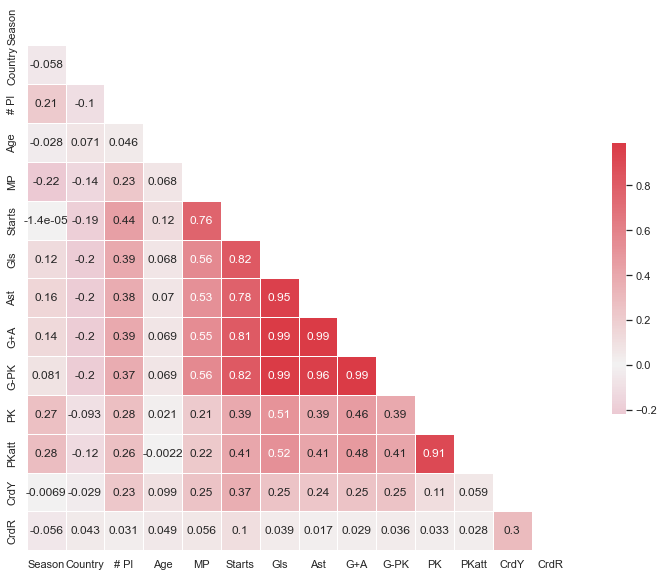

In [192]:
#Ahora vamos a hacer una matriz de correlaciones para ver que columnas están más correlacionadas con el precio
plt.figure(figsize=(15, 10))
sns.set(style='white')

mask=np.triu(np.ones_like(datos.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(datos.corr(),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5})

Nos deshacemos de la única columna categórica que queda en nuestros datos, ya que no podemos hacer una regresión lineal con datos no numéricos. 

Si hacemos la regresión lineal con el resto de columnas, nos daría una regresión lineal muy buena. Sin embargo estaríamos 'falseando' los datos, pues mantenemos las columnas 'G-PK', 'G+A' y 'Ast' que están tan correlacionadas con nuestra variable a predecir que se podría decir que son prácticamente iguales. 

La multicolinealidad puede causar problemas en el modelo de regresión, como coeficientes estimados imprecisos o inestabilidad en las estimaciones. Cuando dos variables independientes están altamente correlacionadas, el modelo puede tener dificultades para distinguir el efecto individual de cada variable sobre la variable dependiente.

Por lo tanto, también nos desharemos de aquellas columnas que están altamente correlacionadas con nuestra variable a predecir, 'Gls'.

In [193]:
datos = datos.drop(columns=['Squad', 'G-PK', 'G+A', 'Ast'])
datos.head()

,Season,Country,# Pl,Age,MP,Starts,Gls,PK,PKatt,CrdY,CrdR
0,17,20,19,26.4,6,66,11,1,1,15.0,1.0
1,17,11,22,28.6,6,66,4,0,2,11.0,0.0
2,17,11,26,26.4,6,66,12,0,0,9.0,0.0
3,17,0,24,26.6,10,110,21,1,1,20.0,1.0
4,17,22,24,26.0,10,110,25,5,5,19.0,0.0


Ya comenzamos con nuestro modelo de regresión lineal, que tratará de predecir los goles.

In [194]:
# Definimos nuestras variables x e y
x = datos.drop('Gls',axis=1)
y = datos['Gls']

# Dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalizamos los datos
pt = PowerTransformer()
pt.fit(x_train)
with open("../scalers/scalers.plk","wb") as f:
    pickle.dump(pt, f)

# Normalizamos lo que se asemeje a una distribución normal
x_train_scaled = pt.transform(x_train)
x_test_scaled = pt.transform(x_test)

y_train_scaled = np.log(y_train)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

x_train_scaled.head()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Season,Country,# Pl,Age,MP,Starts,PK,PKatt,CrdY,CrdR
0,-0.175156,0.660063,-0.216999,-1.205445,-1.200671,-0.872192,0.743613,0.427876,-0.211569,-0.862298
1,0.204203,0.329265,0.896525,1.026128,0.731101,1.198870,-0.904244,-1.033779,1.028363,-0.862298
2,0.901041,0.875943,1.239289,0.890005,0.731101,1.198870,1.693562,1.773210,1.028363,-0.862298
3,1.065372,0.982634,-0.620837,0.202921,-1.200671,-0.872192,0.743613,0.427876,0.549301,-0.862298
4,-0.804102,0.875943,0.169576,-0.425010,-0.052031,0.551663,1.276804,1.033191,-0.480946,0.934792


Si tratamos de hacer una regresión lineal con los datos tal y como están ahora, nos va a salir un error: ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

¿Dónde están estos valores que no nos permiten hacer una regresión lineal?

In [195]:
# Verificamos si hay valores NaN
print(np.any(np.isnan(y_train_scaled)))
print(np.any(np.isnan(x_train_scaled)))

# Verificamos si los valores son finitos
print(np.all(np.isfinite(y_train_scaled)))
print(np.all(np.isfinite(x_train_scaled)))

# Vemos los valores máximos en caso de que sea demasiado grande para float64.
print(np.max(y_train_scaled))
print(np.max(x_train_scaled))

False
False
False
True
3.7612001156935624
Season     1.539886
Country    1.709532
# Pl       3.062746
Age        2.364861
MP         1.930097
Starts     1.735692
PK         1.868195
PKatt      2.079674
CrdY       2.269416
CrdR       1.781182
dtype: float64


C:\Users\Laura Rodríguez\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Vemos que la variable `y_trained_scaled` es la que nos da problemas, pues nos da False cuando le preguntamos si sus valores son finitos.

El próximo paso es identificar los valores infinitos y manjearlos. En nuestro caso, calcularemos el mínimo de los valores finitos y sustituiremos aquellos valores infinitos por el mínimo.

¿Por qué sustituimos por el mínimo? Si nos fijamos, definimos `y_trained_scaled` como un logaritmo y los logaritmos dan -inf cuando el valor x es muy próximo a 0. Por lo tanto, le daremos a aquellos valores no finitos el valor finito más pequeño que tengamos entre nuestros datos.

In [196]:
print(np.unique(y_train_scaled))

[      -inf 0.         0.69314718 1.09861229 1.38629436 1.60943791
 1.79175947 1.94591015 2.07944154 2.19722458 2.30258509 2.39789527
 2.48490665 2.56494936 2.63905733 2.7080502  2.77258872 2.83321334
 2.89037176 2.94443898 2.99573227 3.04452244 3.09104245 3.13549422
 3.17805383 3.21887582 3.25809654 3.29583687 3.33220451 3.36729583
 3.40119738 3.4339872  3.49650756 3.52636052 3.71357207 3.76120012]


In [197]:
# Encontrar el mínimo valor finito
min_valor_finito = np.nanmin(y_train_scaled[np.isfinite(y_train_scaled)])

# Reemplaza los valores infinitos con el mínimo de los valores finitos
y_train_scaled[np.isinf(y_train_scaled)] = min_valor_finito

Ahora ya podemos comenzar con nuestro modelo de regresión lineal.

In [198]:
# Creamos el modelo de regresión lineal
lr = LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [199]:
# Hacemos las predicciones
y_pred = lr.predict(x_test_scaled)

El coeficiente de determinación (R^2) es una medida estadística que indica qué tan bien se ajustan las predicciones de un modelo a los valores reales de la variable dependiente. Varía entre 0 y 1, donde 1 indica una predicción perfecta y 0 indica que el modelo no es mejor que simplemente predecir la media de los datos de entrenamiento.

In [200]:
# Ahora vamos a calcular R^2
r2_score(y_test, np.exp(y_pred))

0.6930441778610177

Vemos que el valor del coeficiente está más cerca del 1 que del 0, por lo que nuestro modelo no va por mal camino. Sin embargo todavía está bastante lejos del 1 así que la predicción podría mejorar.

Por último, graficamos nuestros resultados.

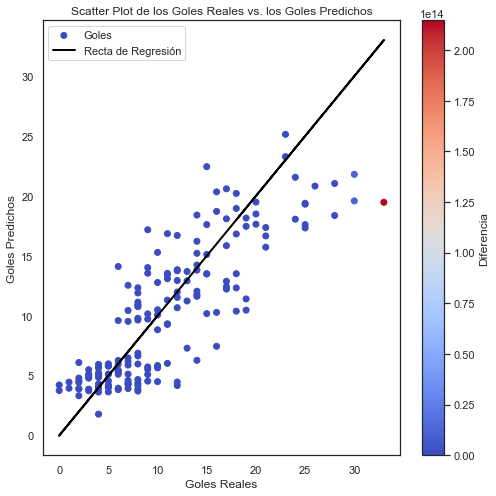

In [201]:
# Creamos una variable que nos indica si la diferencia entre los valores reales y los predichos
diferencia = abs(np.exp(y_test) - np.exp(y_pred))

# Crear el scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, np.exp(y_pred), c=diferencia, cmap='coolwarm', label='Goles')

# Agregar la recta de regresión
plt.plot(y_test, y_test, color='black', linestyle='-', linewidth=2, label='Recta de Regresión')

plt.xlabel('Goles Reales')
plt.ylabel('Goles Predichos')
plt.title('Scatter Plot de los Goles Reales vs. los Goles Predichos')

# Agregar barra de color y leyenda
cbar = plt.colorbar()
cbar.set_label('Diferencia')
plt.legend()

plt.show()

Al calcular el coeficiente de determinación ya vimos que la predicción era buena pero no porfecta y ver los resultados visualmente nos lo afirma. 